In [9]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Plotting baseline
plot_path = os.path.join("plots")
os.makedirs(plot_path, exist_ok=True)
data_path = os.path.join("data")
data_with_mech = "iter_wing_convergence_results_insulated.npz"

In [6]:
baseline_data = np.load(os.path.join(data_path, data_name), allow_pickle=True)
mtow_history = baseline_data["mtow_history"]
S_history = baseline_data["S_history"]
n_iterations = baseline_data["n_iterations"].item()
final_mtow = baseline_data["final_mtow"].item()
final_oew = baseline_data["final_oew"].item()
component_weights = baseline_data["component_weights"].item()

wing_weight_history = component_weights["wing_weight_history"]
fuselage_weight_history = component_weights["fuselage_weight_history"]
landing_gear_weight_history = component_weights["landing_gear_weight_history"]
propulsion_weight_history = component_weights["propulsion_weight_history"]
tail_weight_history = component_weights["tail_weight_history"]
sensor_weight_history = component_weights["sensor_weight_history"]

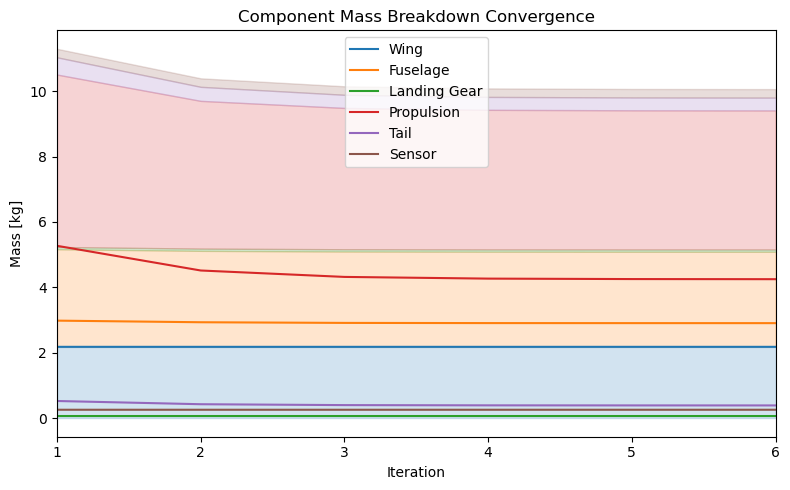

In [13]:
plt.figure(figsize=(8, 5))
iterations = np.arange(len(wing_weight_history))

plt.plot(iterations, wing_weight_history, label="Wing")
plt.plot(iterations, fuselage_weight_history, label="Fuselage")
plt.plot(iterations, landing_gear_weight_history, label="Landing Gear")
plt.plot(iterations, propulsion_weight_history, label="Propulsion")
plt.plot(iterations, tail_weight_history, label="Tail")
plt.plot(iterations, sensor_weight_history, label="Sensor")
# Get the colors used by the line plots
lines = plt.gca().get_lines()
component_histories = [
    wing_weight_history,
    fuselage_weight_history,
    landing_gear_weight_history,
    propulsion_weight_history,
    tail_weight_history,
    sensor_weight_history,
]

# Stack the component histories for cumulative sum
cumulative = np.zeros_like(wing_weight_history)
for arr, line in zip(component_histories, lines):
    prev_cumulative = cumulative.copy()
    cumulative += arr
    plt.fill_between(
        iterations[1:], prev_cumulative[1:], cumulative[1:], 
        alpha=0.2, color=line.get_color()
    )

plt.xlim(1, len(iterations) - 1)
plt.xlabel("Iteration")
plt.ylabel("Mass [kg]")
plt.title("Component Mass Breakdown Convergence")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plot_path, "mass_breakdown_convergence.png"))
plt.show()


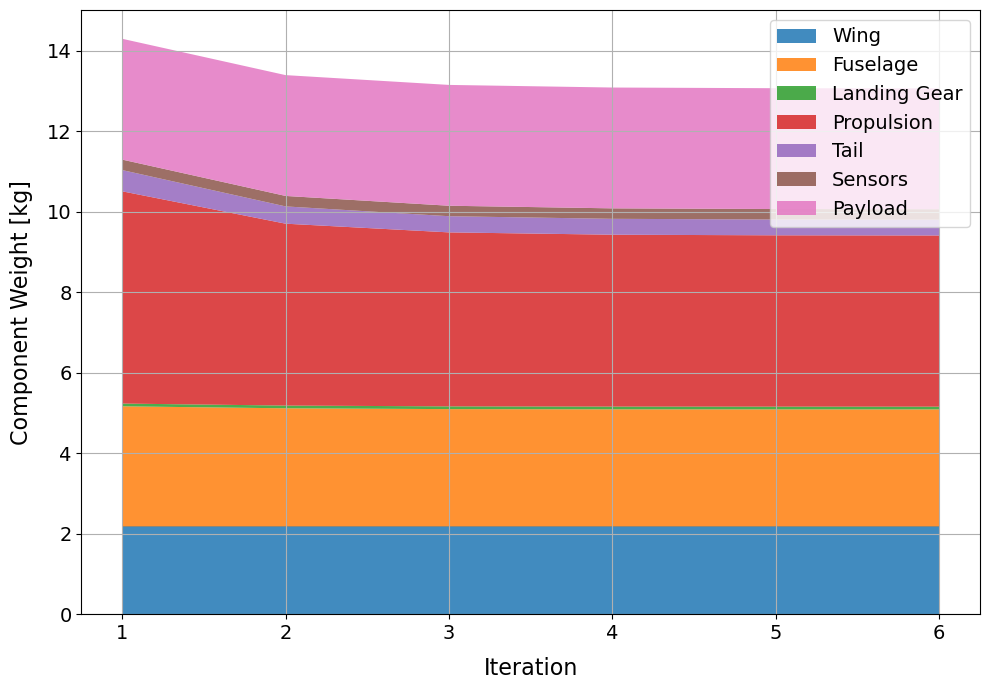

In [20]:
# Load or use your histories
# No need to redefine payload_mass or histories, as all required variables are already present

# Add payload mass (constant over iterations)
payload_mass = 3.0  # Set your payload mass here

iterations = np.arange(1, len(wing_weight_history))
component_arrays = [
    np.array(wing_weight_history[1:], dtype=float),
    np.array(fuselage_weight_history[1:], dtype=float),
    np.array(landing_gear_weight_history[1:], dtype=float),
    np.array(propulsion_weight_history[1:], dtype=float),
    np.array(tail_weight_history[1:], dtype=float),
    np.array(sensor_weight_history[1:], dtype=float),
]
labels = [
    "Wing",
    "Fuselage",
    "Landing Gear",
    "Propulsion",
    "Tail",
    "Sensors",
]
colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
]
component_arrays.append(np.full_like(iterations, payload_mass, dtype=float))
labels.append("Payload")
colors.append("#e377c2")  # pink

plt.figure(figsize=(10, 7))
plt.stackplot(
    iterations,
    component_arrays,
    labels=labels,
    colors=colors,
    alpha=0.85,
)
plt.xlabel("Iteration", fontsize=16, labelpad=10)
plt.ylabel("Component Weight [kg]", fontsize=16, labelpad=10)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig(
    os.path.join("plots", "mtow_mass_breakdown_stackplot.pdf"),
    dpi=300, format="pdf", bbox_inches="tight"
)
plt.show()

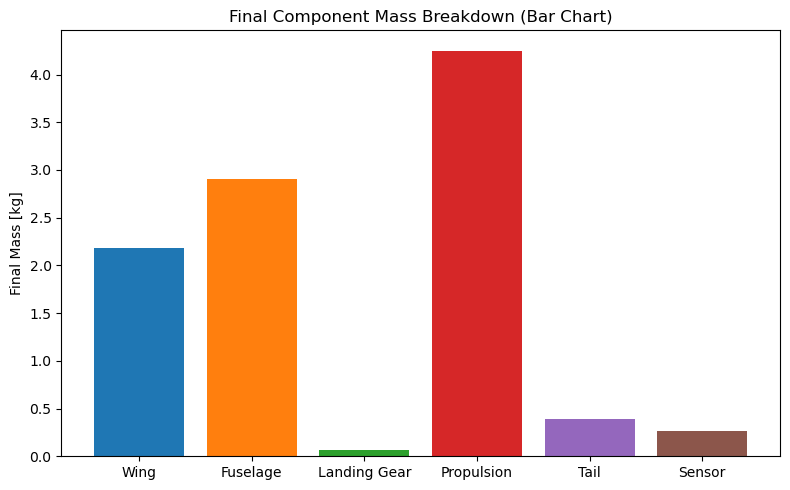

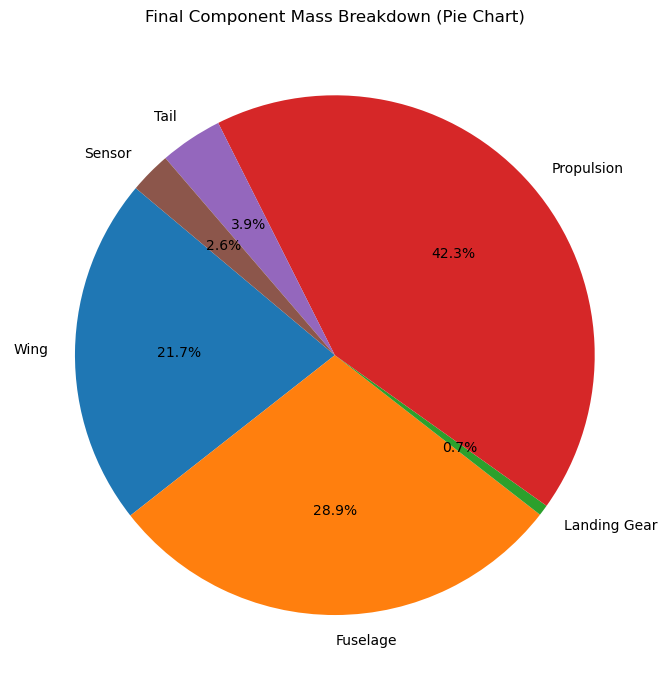

In [39]:
# Prepare data for final converged masses
final_weights = [
    wing_weight_history[-1],
    fuselage_weight_history[-1],
    landing_gear_weight_history[-1],
    propulsion_weight_history[-1],
    tail_weight_history[-1],
    sensor_weight_history[-1],
]
component_names = ["Wing", "Fuselage", "Landing Gear", "Propulsion", "Tail", "Sensor"]

# Vertical bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(component_names, final_weights, color=colors)
plt.ylabel("Final Mass [kg]")
plt.title("Final Component Mass Breakdown (Bar Chart)")
plt.tight_layout()
plt.savefig(os.path.join(plot_path, "final_mass_breakdown_bar.png"))
plt.show()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(final_weights, labels=component_names, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Final Component Mass Breakdown (Pie Chart)")
plt.tight_layout()
plt.savefig(os.path.join(plot_path, "final_mass_breakdown_pie.png"))
plt.show()

In [45]:
# Plotting baseline
plot_path = os.path.join("plots")
os.makedirs(plot_path, exist_ok=True)
data_path = os.path.join("data")
data_with_mech_class_1 = "iter_wing_convergence_results_insulated.npz"
data_no_mech_class_1 = "iter_wing_convergence_results_classI_mech.npz"
data_no_transition = "iter_wing_convergence_results_no_transition.npz"

In [46]:
class_I_with_mech_data = np.load(os.path.join(data_path, data_with_mech_class_1), allow_pickle=True)
mtow_history_v1 = class_I_with_mech_data["mtow_history"]
S_history_v1 = class_I_with_mech_data["S_history"]
n_iterations_v1 = class_I_with_mech_data["n_iterations"].item()
final_mtow_v1 = class_I_with_mech_data["final_mtow"].item()
final_oew_v1 = class_I_with_mech_data["final_oew"].item()
component_weights_v1 = class_I_with_mech_data["component_weights"].item()
print(mtow_history_v1[-1])
wing_weight_history_v1 = component_weights_v1["wing_weight_history"]
fuselage_weight_history_v1 = component_weights_v1["fuselage_weight_history"]
landing_gear_weight_history_v1 = component_weights_v1["landing_gear_weight_history"]
propulsion_weight_history_v1 = component_weights_v1["propulsion_weight_history"]
tail_weight_history_v1 = component_weights_v1["tail_weight_history"]
sensor_weight_history_v1 = component_weights_v1["sensor_weight_history"]


[13.06042026]


In [47]:
class_I_with_mech_data = np.load(os.path.join(data_path, data_no_mech_class_1), allow_pickle=True)
mtow_history_v2 = class_I_with_mech_data["mtow_history"]
S_history_v2 = class_I_with_mech_data["S_history"]
n_iterations_v2 = class_I_with_mech_data["n_iterations"].item()
final_mtow_v2 = class_I_with_mech_data["final_mtow"].item()
final_oew_v2 = class_I_with_mech_data["final_oew"].item()
component_weights_v2 = class_I_with_mech_data["component_weights"].item()
print(mtow_history_v2[-1])
wing_weight_history_v2 = component_weights_v2["wing_weight_history"]
fuselage_weight_history_v2 = component_weights_v2["fuselage_weight_history"]
landing_gear_weight_history_v2 = component_weights_v2["landing_gear_weight_history"]
propulsion_weight_history_v2 = component_weights_v2["propulsion_weight_history"]
tail_weight_history_v2 = component_weights_v2["tail_weight_history"]
sensor_weight_history_v2 = component_weights_v2["sensor_weight_history"]


[13.06276933]


In [48]:
class_I_with_mech_data = np.load(os.path.join(data_path, data_no_transition), allow_pickle=True)
mtow_history_v3 = class_I_with_mech_data["mtow_history"]
S_history_v3 = class_I_with_mech_data["S_history"]
n_iterations_v3 = class_I_with_mech_data["n_iterations"].item()
final_mtow_v3 = class_I_with_mech_data["final_mtow"].item()
final_oew_v3 = class_I_with_mech_data["final_oew"].item()
component_weights_v3 = class_I_with_mech_data["component_weights"].item()
print(mtow_history_v3[-1])
wing_weight_history_v3 = component_weights_v3["wing_weight_history"]
fuselage_weight_history_v3 = component_weights_v3["fuselage_weight_history"]
landing_gear_weight_history_v3 = component_weights_v3["landing_gear_weight_history"]
propulsion_weight_history_v3 = component_weights_v3["propulsion_weight_history"]
tail_weight_history_v3 = component_weights_v3["tail_weight_history"]
sensor_weight_history_v3 = component_weights_v3["sensor_weight_history"]

[13.29162456]


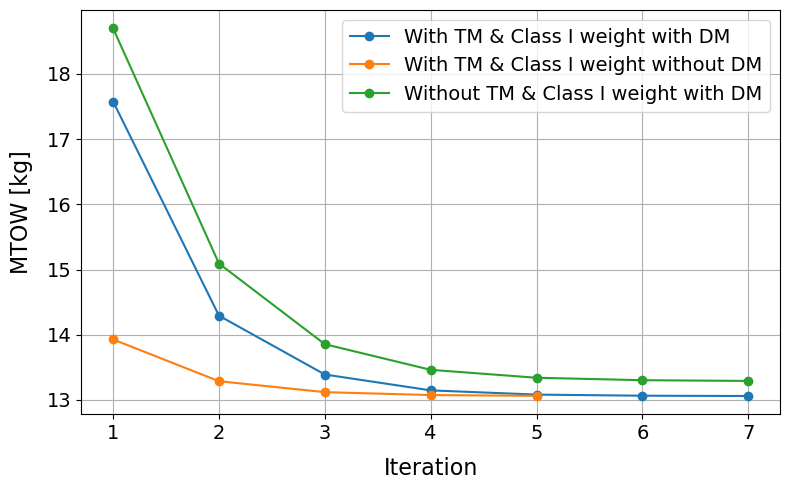

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(mtow_history_v1) + 1), mtow_history_v1.flatten(), marker='o', color='tab:blue', label='With TM & Class I weight with DM')
plt.plot(np.arange(1, len(mtow_history_v2) + 1), mtow_history_v2.flatten(), marker='o', color='tab:orange', label='With TM & Class I weight without DM')
plt.plot(np.arange(1, len(mtow_history_v3) + 1), mtow_history_v3.flatten(), marker='o', color='tab:green', label='Without TM & Class I weight with DM')
plt.xlabel("Iteration", fontsize=16, labelpad=10)
plt.ylabel("MTOW [kg]", fontsize=16, labelpad=10)
# plt.legend(fontsize=14, loc='upper right')
plt.tick_params(labelsize=14)
# plt.title("Convergence of Maximum Takeoff Weight (MTOW)")
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, "baseline_mtow_convergence.pdf"))
plt.show()